## Annotation of secondary structure elements to an RNA graph

in this notebook we will:
    - fold RNAs to networkx graphs via rnafold
    - annotate the elements
    - and plot the annotated graphs

In [ ]:
import itertools
from eden.converter.fasta import fasta_to_sequence

%matplotlib inline

def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)
def get_sequences(size=9999,withoutnames=False):
    sequences = itertools.islice( fasta_to_sequence(rfam_uri("RF00005")), size)
    return sequences



Annotated graphs will have the lists part_name and part_id added to the nodes.

Below I show the nucleotide label and the human readable part_name on the graphs.

'part_name's tell you which type of structure you are looking at.

'part_id' is a unique id for each structure element, eg all nodes belonging to the same stem will have the same part_id.

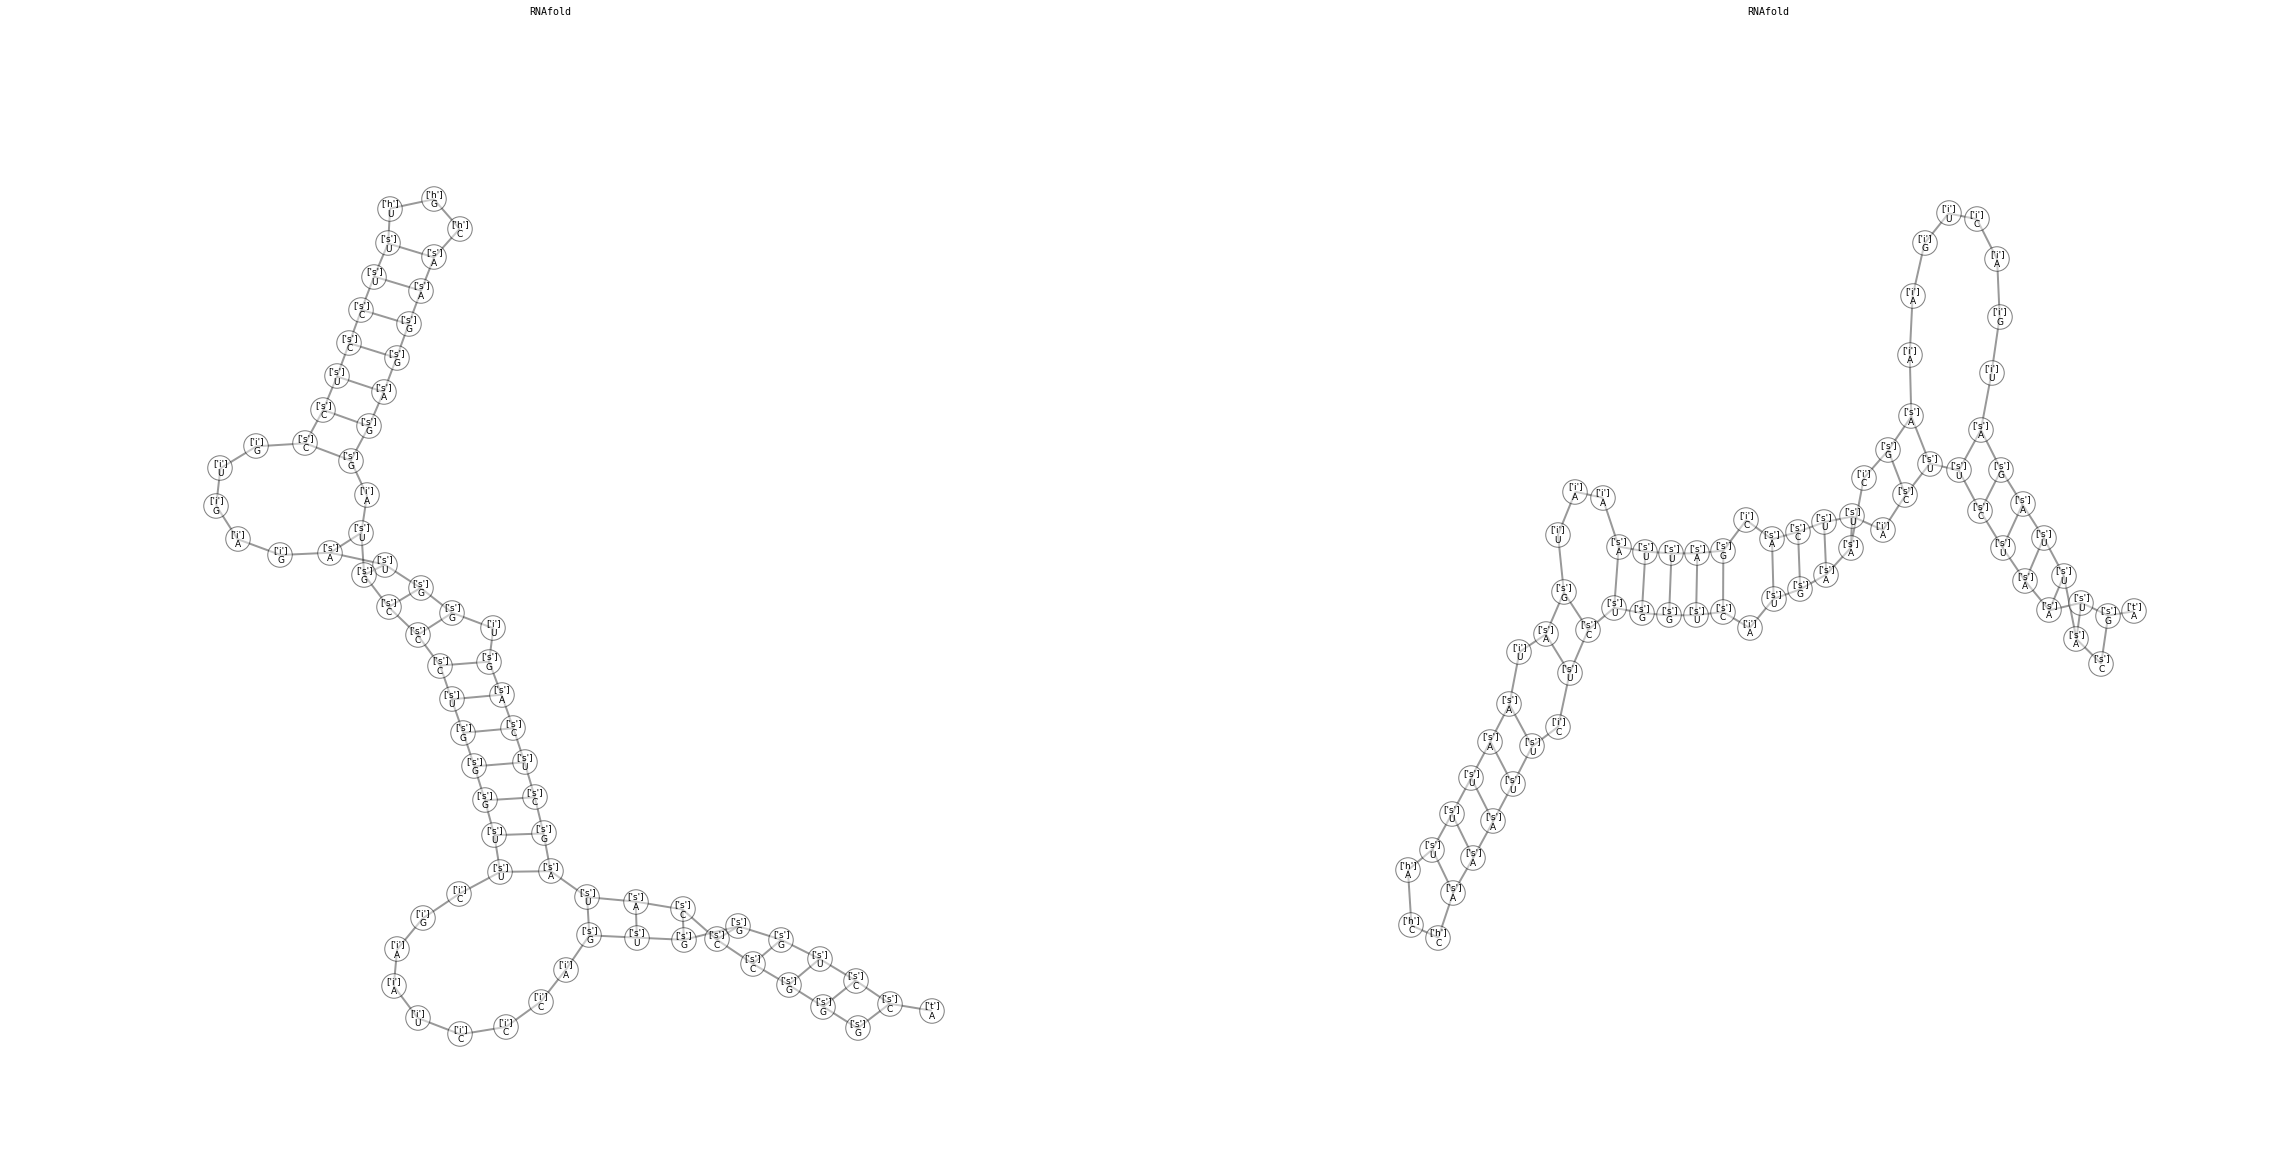

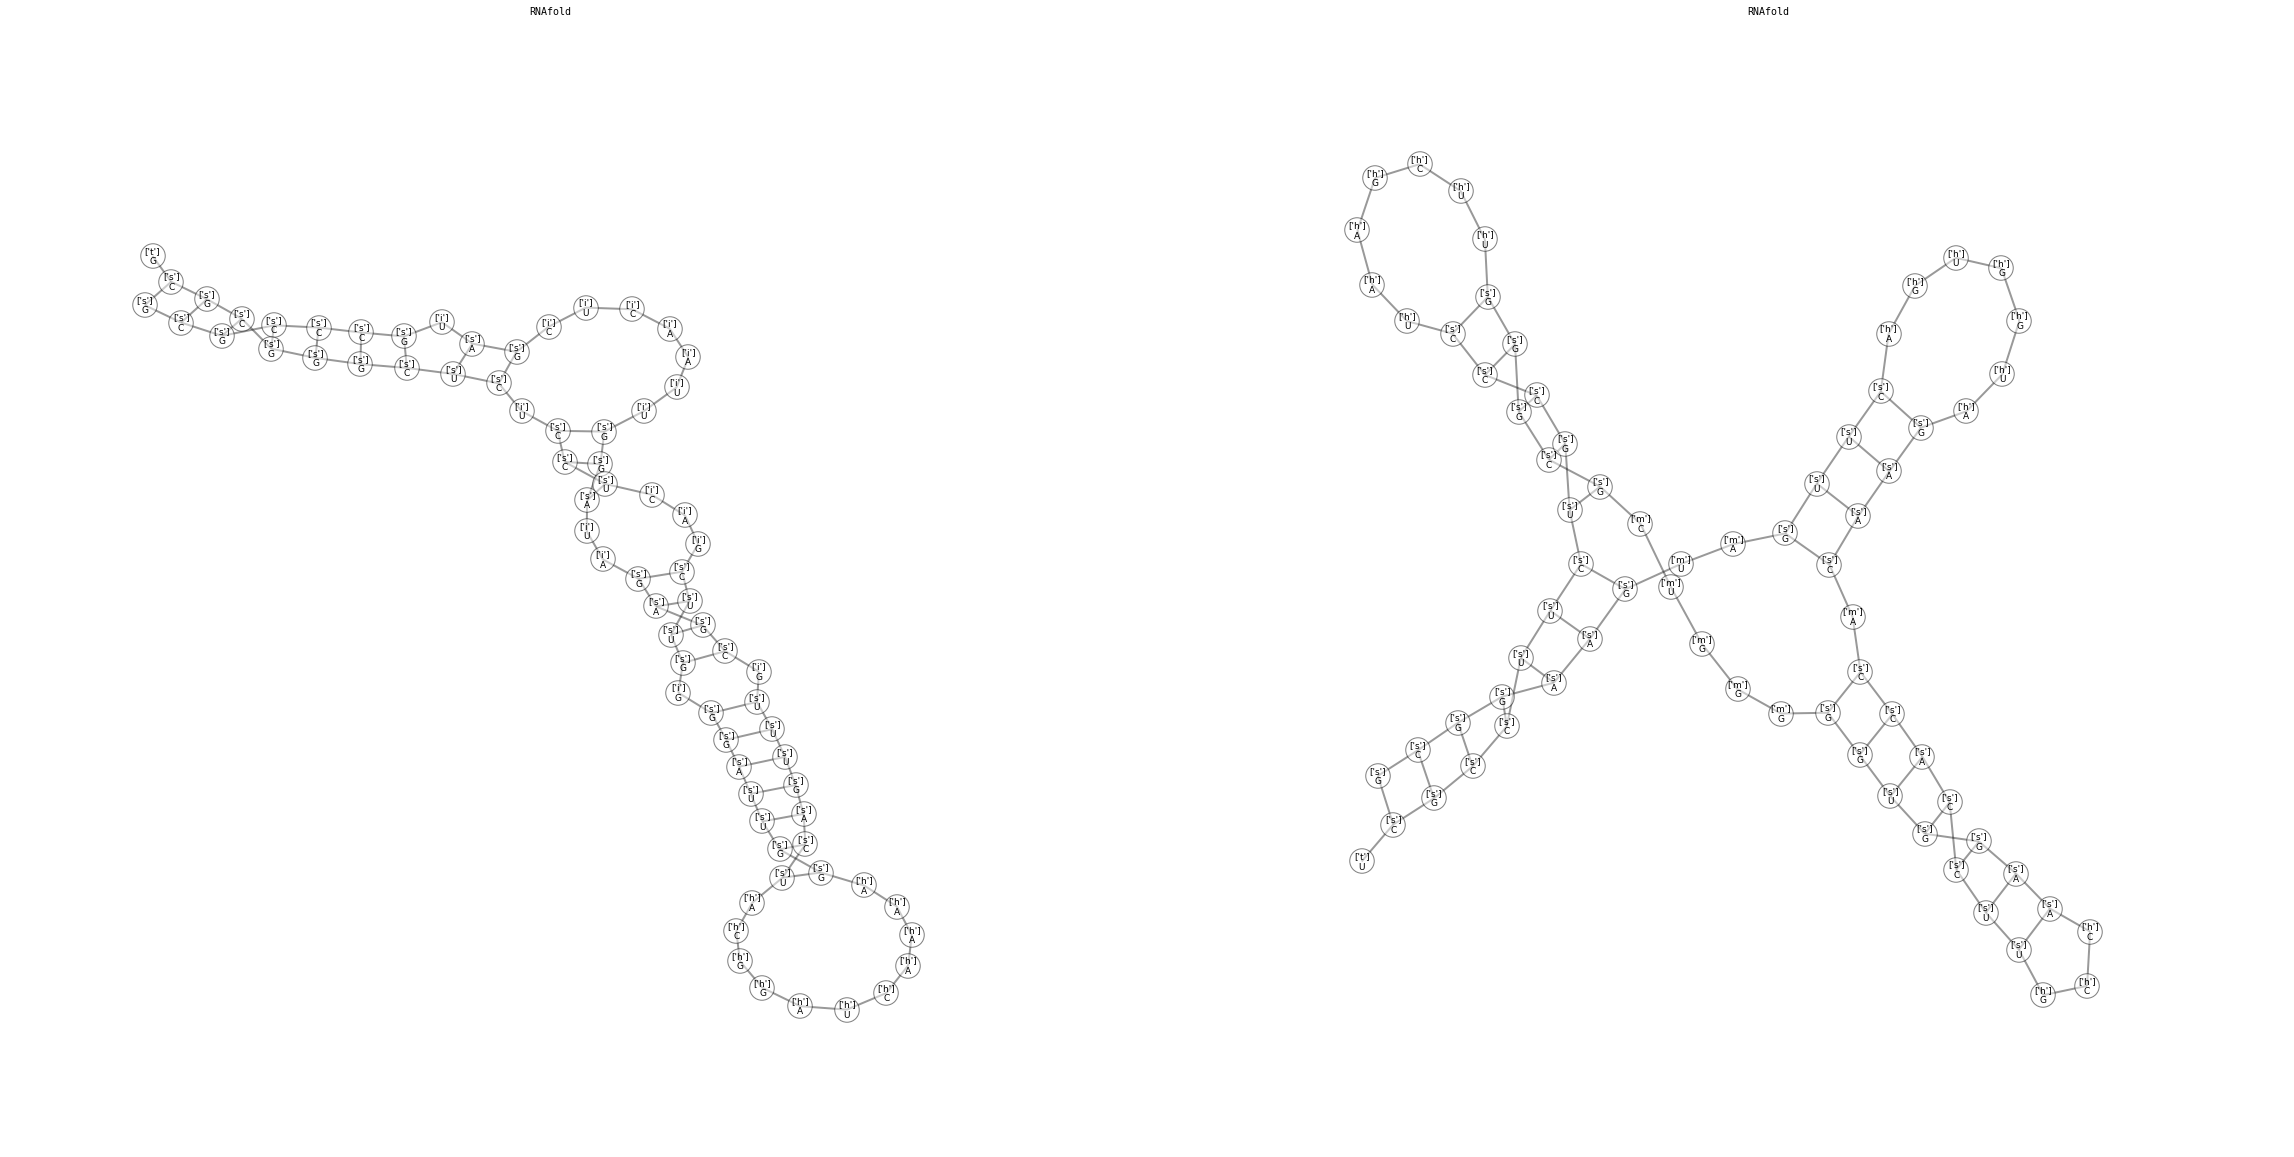

In [22]:
from eden.converter.rna.rnafold import  rnafold_to_eden as rnafold
from eden.modifier.rna.structure_annotation import Annotator as structureAnnotator

# get sequences
sequences = get_sequences(size=4)
# fold them 
RNAgraphs=rnafold(sequences)

# create annotater
RNAAnnotator=structureAnnotator()
# transform
annotated_graphs = RNAAnnotator.transform(RNAgraphs)


#draw
from eden.util.display import draw_graph_set
draw_graph_set(annotated_graphs,n_graphs_per_line=2, size=20,
                       colormap='Paired', invert_colormap=False,node_border=0.5,vertex_label='part_name',
                       secondary_vertex_label='label',
                       vertex_alpha=0.5, edge_alpha=0.4, node_size=600)